## Transações realizadas com cartões de crédito em setembro de 2013 por portadores de cartões europeus

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Filtra o DataFrame para contar o número de transações fraudulentas (onde a coluna 'Class' é igual a 1)
quantidade_fraude = df[df['Class'] == 1].shape[0]

# Filtra o DataFrame para contar o número de transações normais (onde a coluna 'Class' é igual a 0)
quantidade_normal = df[df['Class'] == 0].shape[0]


print(f"Quantidade de transações fraudulentas: {quantidade_fraude}")
print(f"Quantidade de transações normais: {quantidade_normal}")

Quantidade de transações fraudulentas: 492
Quantidade de transações normais: 284315


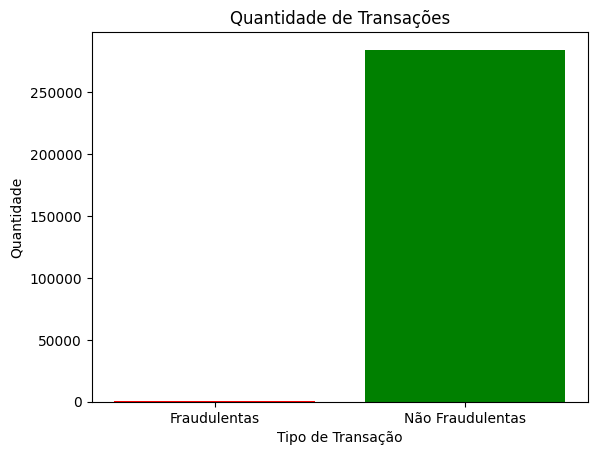

Percentual de transações fraudulentas: 0.17%
Percentual de transações normais: 99.83%


In [4]:
labels = ['Fraudulentas', 'Não Fraudulentas']
quantidades = [quantidade_fraude, quantidade_normal]

plt.bar(labels, quantidades, color=['red', 'green'])

plt.title('Quantidade de Transações')
plt.xlabel('Tipo de Transação')
plt.ylabel('Quantidade')

plt.show()

total_transacoes = quantidade_fraude + quantidade_normal

percentual_fraude = (quantidade_fraude / total_transacoes) * 100
percentual_normal = (quantidade_normal / total_transacoes) * 100

print(f"Percentual de transações fraudulentas: {percentual_fraude:.2f}%")
print(f"Percentual de transações normais: {percentual_normal:.2f}%")

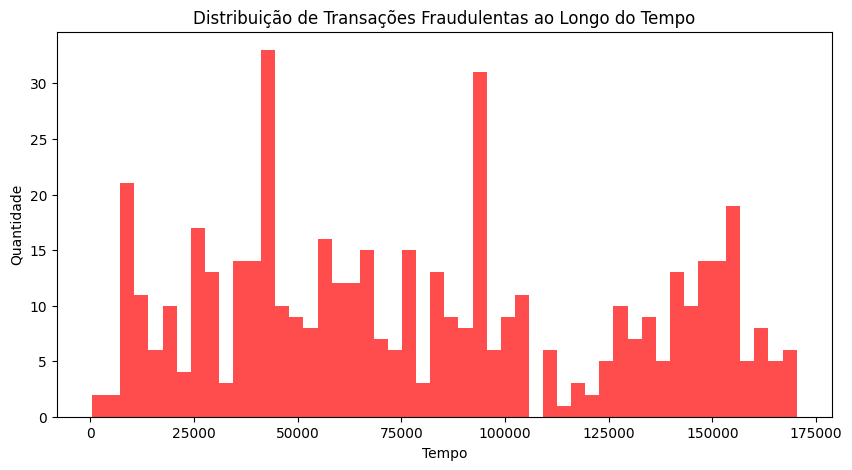

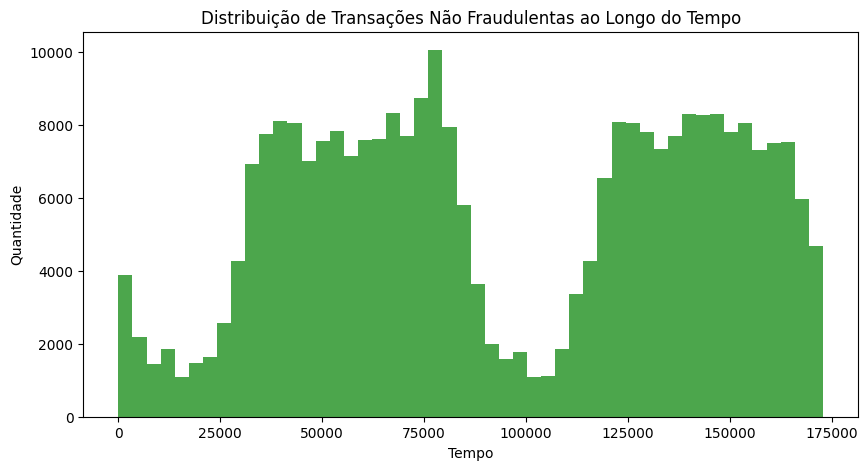

In [5]:
transacoes_fraudulentas = df[df['Class'] == 1]

transacoes_normais = df[df['Class'] == 0]

plt.figure(figsize=(10, 5))
plt.hist(transacoes_fraudulentas['Time'], bins=50, color='red', alpha=0.7)
plt.title('Distribuição de Transações Fraudulentas ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(transacoes_normais['Time'], bins=50, color='green', alpha=0.7)
plt.title('Distribuição de Transações Não Fraudulentas ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.show()

In [6]:
print("Fraudes")
print(df.Amount[df.Class == 1].describe()) 
print("\n")
print("Não Fraudes")
print(df.Amount[df.Class == 0].describe())

Fraudes
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Não Fraudes
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


## Explicação sobre as colunas V1 a V28

As colunas **V1** a **V28** do conjunto de dados já passaram por um processo de redução de dimensionalidade por **Análise de Componentes Principais (PCA)**. Esse procedimento foi realizado para preservar a privacidade dos dados dos clientes envolvidos nas transações, evitar a "maldição da dimensionalidade" e economizar recursos computacionais.

Imagine uma análise de correlação linear entre duas variáveis, como V1 e V2. Nesse caso, teríamos um gráfico bidimensional com dois eixos (V1, V2). No entanto, ao comparar várias variáveis simultaneamente, a visualização se torna inviável sem a redução de dimensionalidade, pois seria necessário um gráfico de diversas dimensões, algo impossível de interpretar, já que nossa compreensão visual é limitada a até três dimensões.  

O PCA transforma as variáveis originais em combinações lineares que capturam as correlações entre elas, reduzindo a dimensionalidade do conjunto de dados enquanto mantém a maior parte da variabilidade presente. Assim, as colunas **V1** a **V28** representam componentes principais que descrevem as relações entre as variáveis originais, sem revelar diretamente os dados brutos das transações.

In [7]:
# Lista com os nomes das colunas que passaram pelo PCA

PCA_features = df.iloc[:,1:29].columns

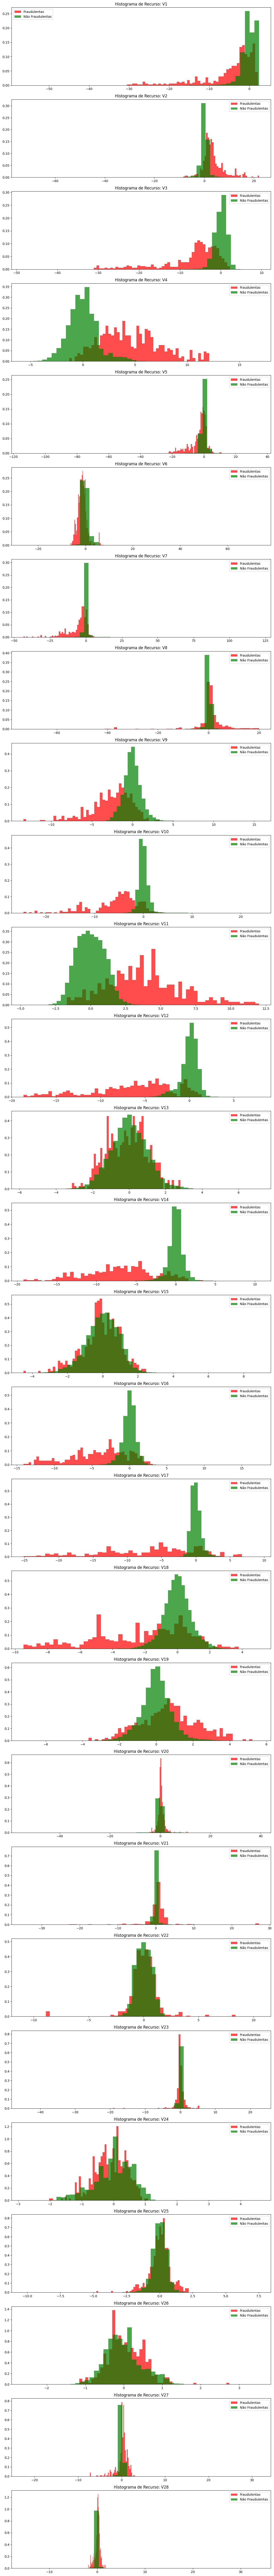

In [8]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12, 28 * 4))
gs = gridspec.GridSpec(28, 1)

for i, cn in enumerate(PCA_features):
    ax = plt.subplot(gs[i])
    ax.hist(df[cn][df.Class == 1], bins=50, color='red', alpha=0.7, label='Fraudulentas', density=True)
    ax.hist(df[cn][df.Class == 0], bins=50, color='green', alpha=0.7, label='Não Fraudulentas', density=True)
    ax.set_title(f'Histograma de Recurso: {cn}')
    ax.set_xlabel('')
    ax.legend()

plt.tight_layout()
plt.show()

In [9]:
# Podemos descartar algumas colunas que possuem distribuição semelhante entre transações fraudulentas e normais para evitar confusão no modelo.

df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis=1)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0


In [10]:
from sklearn.preprocessing import StandardScaler

# Normaliza os dados da coluna 'Amount' para que tenham média 0 e desvio padrão 1
# Isso é feito para garantir que todas as características tenham a mesma escala, o que é importante para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.
# Valores de transação são muito diferentes entre si, então é importante normalizá-los para que não dominem o modelo.

df['Normalized_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V12,V14,V16,V17,V18,V19,V21,Amount,Class,Normalized_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,0,-0.073403


In [11]:
# Dropamos a coluna 'Amount' original, pois agora temos uma versão normalizada dela chamada 'Normalized_Amount'
# Além disso, a coluna 'Time' não é relevante para o modelo, então também a descartamos.

df = df.drop(['Time','Amount'],axis=1)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,0,-0.073403


## Claramente há um desequilíbrio nas amostras:

- Percentual de transações fraudulentas: 0.17%
- Percentual de transações normais: 99.83%

Sendo assim, vamos:

- Reamostrar os dados

In [12]:
from sklearn.utils import resample

# Número de transações fraudulentas
n_fraudes = quantidade_fraude
print(f"Quantidade de transações fraudulentas: {n_fraudes}")

# Subamostragem aleatória da classe normal
transacoes_normais_subamostradas = resample(transacoes_normais, 
                                            replace=False, # Cada transação normal só pode ser escolhida uma vez.
                                            n_samples=n_fraudes, # Número de transações normais a serem escolhidas é igual ao número de transações fraudulentas.
                                            random_state=42)

# Combina as transações fraudulentas com as transações normais subamostradas
df_reamostrado = pd.concat([transacoes_fraudulentas, transacoes_normais_subamostradas])

# Embaralha os dados
df_reamostrado = df_reamostrado.sample(frac=1, random_state=42).reset_index(drop=True) 
# frac=1 significa que queremos embaralhar 100% dos dados, random_state garante que o embaralhamento seja reproduzível.

# Exibe a distribuição das classes no novo conjunto de dados
print(df_reamostrado['Class'].value_counts())

Quantidade de transações fraudulentas: 492
Class
0    492
1    492
Name: count, dtype: int64


In [13]:
df_reamostrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22  V2

In [14]:
df_reamostrado.to_csv("creditcard_reamostrado.csv", index=False)
# Salva o DataFrame reamostrado em um arquivo CSV chamado "creditcard_reamostrado.csv"